<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Телеком-—-задача-проекта-(оригинальное-описание)" data-toc-modified-id="Телеком-—-задача-проекта-(оригинальное-описание)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Телеком — задача проекта (оригинальное описание)</a></span><ul class="toc-item"><li><span><a href="#Описание-услуг" data-toc-modified-id="Описание-услуг-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание услуг</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные</a></span></li></ul></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План работы</a></span></li></ul></div>

## Телеком — задача проекта (оригинальное описание)

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Данные

[final_provider.zip](https://github.com/oxytwtr/20_ML_Telecom_customer_loss/blob/main/datasets/final_provider.zip?raw=true)


Данные также находятся в папке `/datasets/final_provider/`.

## План работы


- Открыть и изучить данные
- Выполнить предобработку данных
  - приведение имен признаков к змеиному регистру
  - изменение типов данных на соответствующий содержанию
  - повторный осмотр данных
  - проверка уникальных значений каждого признака и удаление неявных дубликатов
  - оценка выбросов в данных
  - проверка соответствия комбинаций customerID - > BeginDate -> EndDate во всех наборах данных
 
- Подготовка признаков
  - создание целевого признака на основании комбинации customerID - > BeginDate -> EndDate
  - оценка информативности признаков
  - создание иогового набора признаков
  - выбор итоговой метрики / критериев выбора лучшей модели
  - выбор алгоритмов ML для исследования и алгоритма для базовой модели
  - выбор методов предобработки / кодирования признаков
  - разделение выборки на тренировочную/ валидационную и тестовую часть
  
- Исследование моделей  
  - создание пайплайна предобработки признаков / обучения моделей для выбранных алгоритмов ML
  - обучение моделей на выбранных алгоритмах ML
  - выбор подходящей модели на основании метрики на валидационной выборке / критериев выбора лучшей модели

- Тестирование выбранной модели на тестовой выборке
  - получение метрики на тестовой выборке для выбранной модели 
  - получние метрики на тествой выборке для базовой модели (проверка адекватности)
  - финальный отчет и защита исследования
  

In [1]:
import pandas as pd


In [11]:
def first_info(dataframe, data_title='Неопознанный набор данных',
               head_length=6, bins=42, figsize=(15,12),
               info_show=True, describe_show=True, corr_show=True, hist_show=True):
    '''
    dataframe: датафрейм для анализа
    data_title: пользовательское название набора данных
    head_length: количество строк, отображаемых функцией при выводе датасета
    bins: для гистограммы - количество корзин, 42 by default
    figsize: для гистограммы - размер графика, кортеж (15,12) by default
    info_show: True, если нужно показывать результат метода DataFrame.info(), True by default 
    describe_show: True, если нужно показывать результат метода DataFrame.describe(), True by default 
    corr_show: True, если нужно показывать результат метода DataFrame.сorr(), True by default 
    hist_show: True, если нужно показывать гистограмму распределений значений DataFrame, True by default
    
    Функция  принимает на вход Pandas.DataFrame, Краткое название датафрейма (для вывода в логе выполнения функции) 
    и количество строк датафрейма, которое будет выводить функция в ходе работы. 
    Функция создана для упрощения первичного знакомства с данными
    Возвращает None
    '''
    try:
        print(f'Данные по датасету: {data_title}')
        display(dataframe.head(head_length))
        display(dataframe.tail(head_length))
        if info_show:
            dataframe.info()
        if describe_show:
            print()
            print(f'Описательная статистика датасета:')
            display(dataframe.describe())
        if corr_show:
            print('Корреляция значений признаков')
            display(pd.DataFrame(dataframe.corr()))
        if hist_show:    
            dataframe.hist(bins=bins, figsize=figsize);
        
    except:
        print(f'Ошибка в передаваемых аргументах\nПроверьте ввод!')

In [12]:
ds_contract = pd.read_csv('../datasets/final_provider/contract.csv')
ds_internet = pd.read_csv('../datasets/final_provider/internet.csv')
ds_personal = pd.read_csv('../datasets/final_provider/personal.csv')
ds_phone = pd.read_csv('../datasets/final_provider/phone.csv')

Данные по датасету: информация о договоре


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Описательная статистика датасета:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Корреляция значений признаков


,MonthlyCharges
MonthlyCharges,1.0


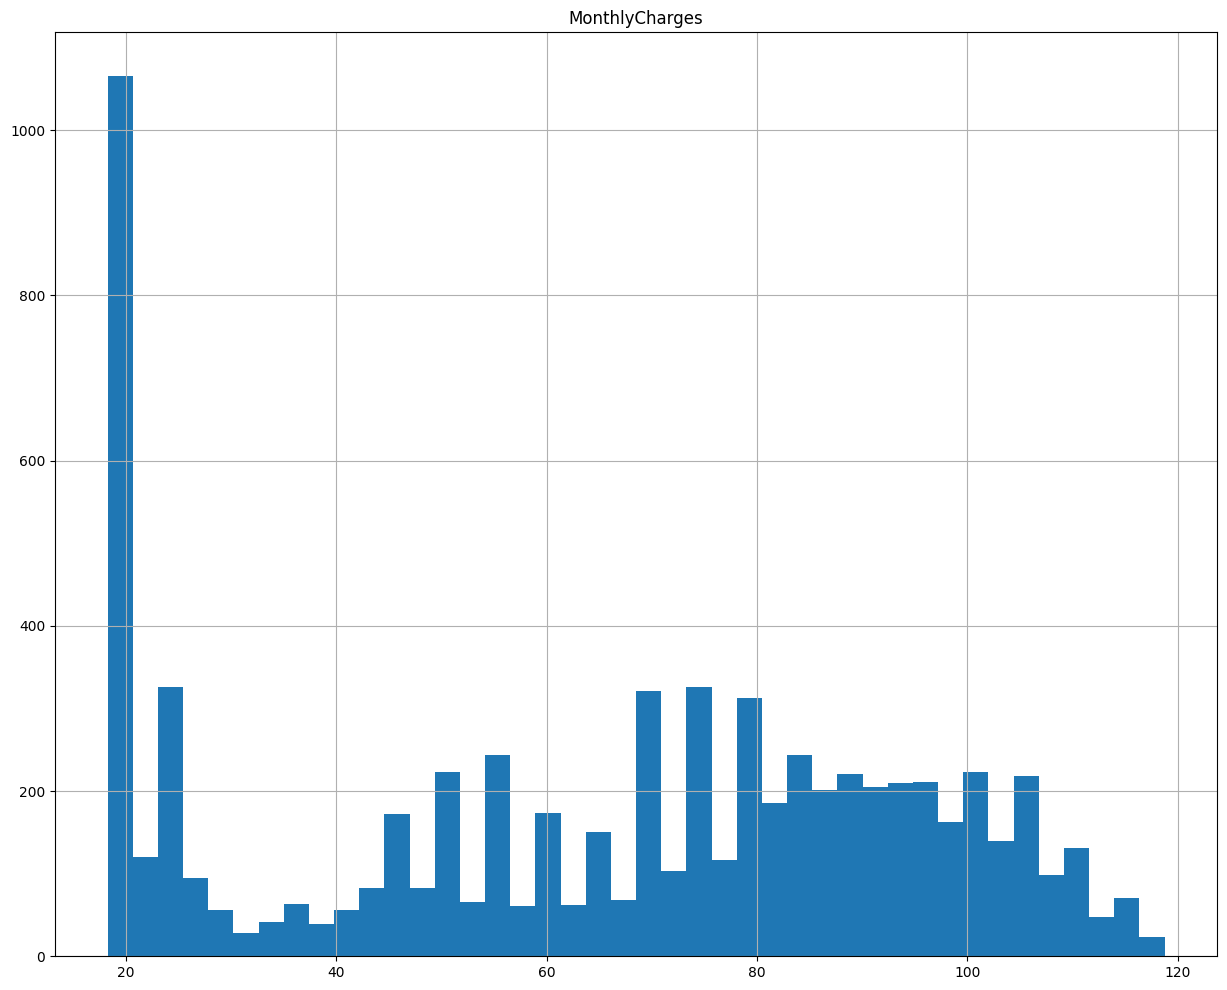

In [13]:
first_info(ds_contract, 'информация о договоре')

Данные по датасету: персональные данные клиента


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Описательная статистика датасета:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Корреляция значений признаков


,MonthlyCharges
MonthlyCharges,1.0


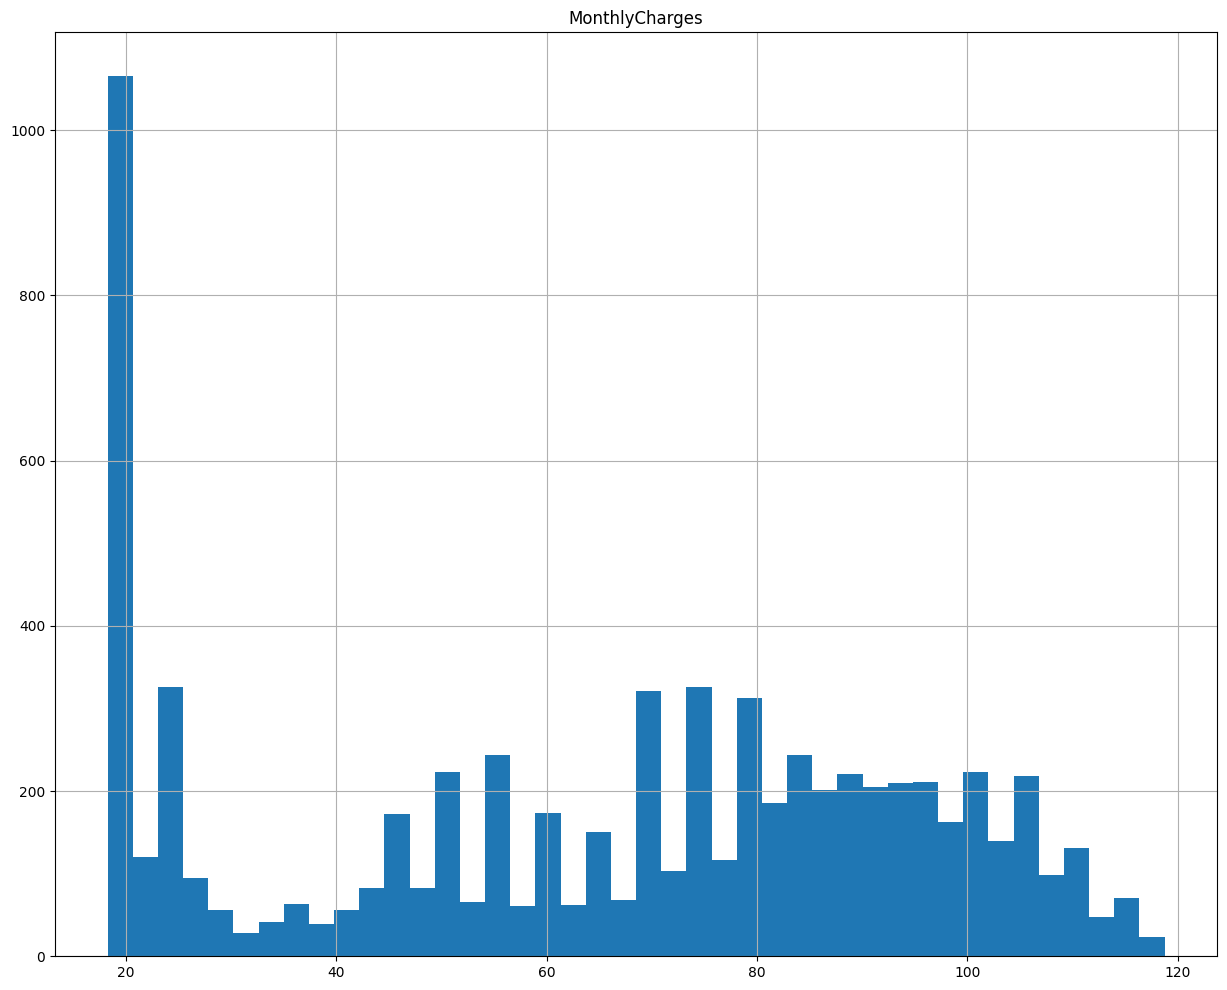

In [14]:
first_info(ds_contract, 'персональные данные клиента')

Данные по датасету: информация об интернет-услугах


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Описательная статистика датасета:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Корреляция значений признаков


,MonthlyCharges
MonthlyCharges,1.0


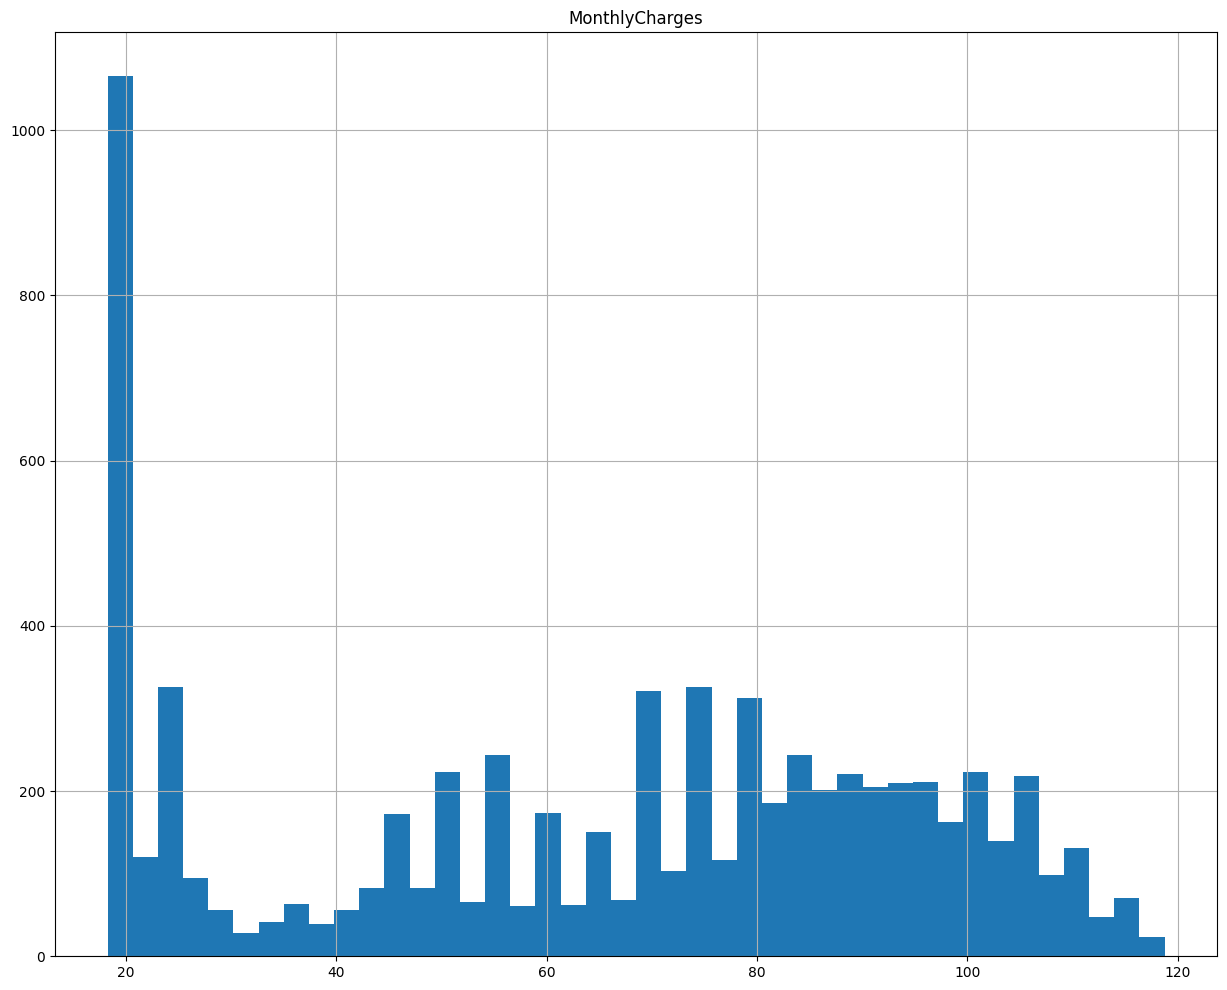

In [15]:
first_info(ds_contract, 'информация об интернет-услугах')

Данные по датасету: информация об услугах телефонии


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Описательная статистика датасета:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Корреляция значений признаков


,MonthlyCharges
MonthlyCharges,1.0


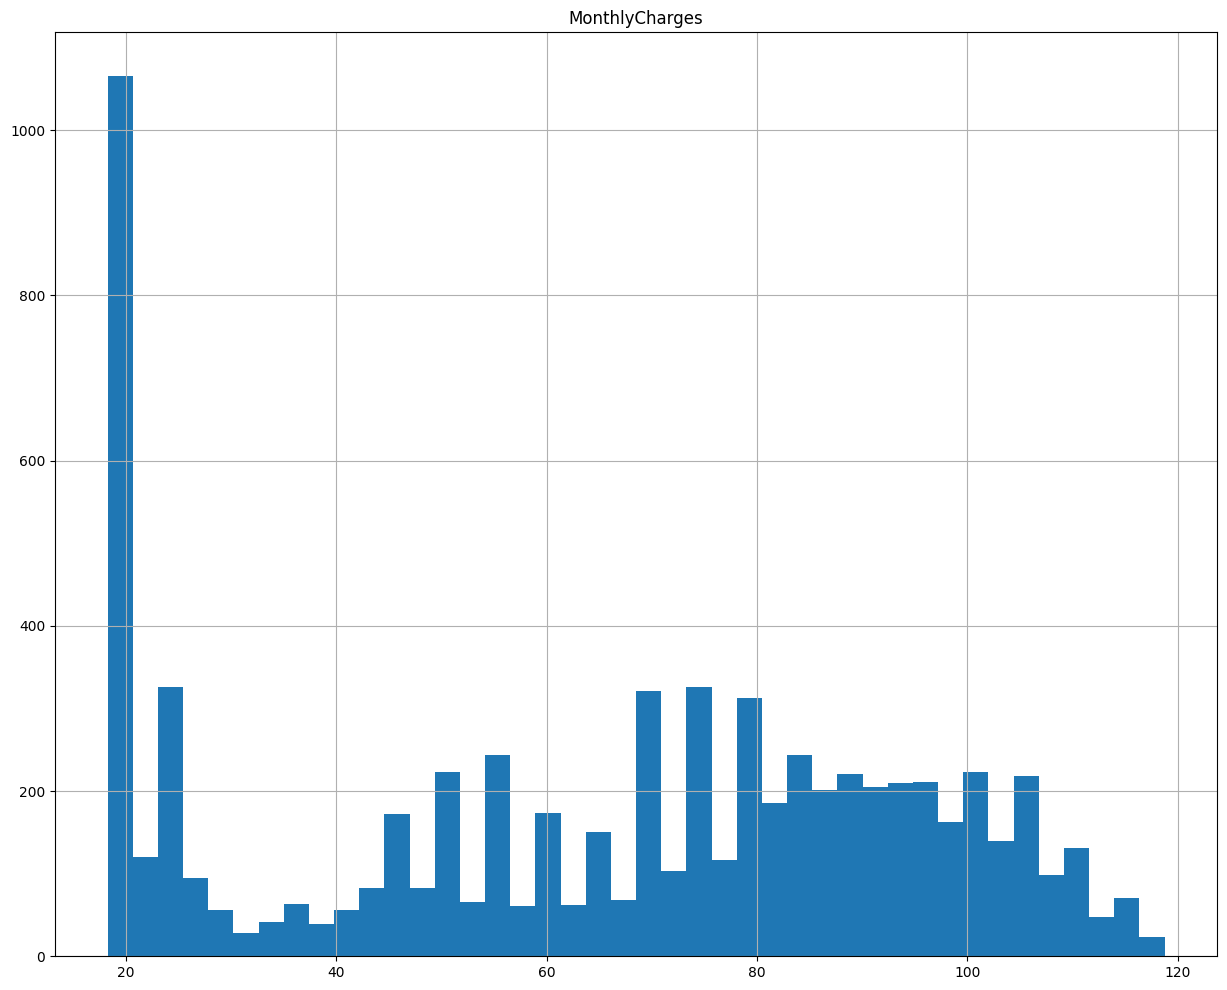

In [16]:
first_info(ds_contract, 'информация об услугах телефонии')